In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from textblob import TextBlob

import pickle

from datetime import datetime

In [2]:
data = pd.read_pickle("all_data.pkl")
data.head(2)

,content,score_x,at,appId,title,summary,genre,installs,minInstalls,score_y,ratings,reviews,free,released
0,work with this app be so difficult default num...,1,2021-01-26 14:53:28,com.google.android.contacts,Contacts,Back up your contacts & access them anywhere,Communication,"500,000,000+",500000000,4.284028,532472,134994,True,"Dec 7, 2015"
1,i would give it star if possible no option for...,1,2021-01-31 07:36:32,com.google.android.contacts,Contacts,Back up your contacts & access them anywhere,Communication,"500,000,000+",500000000,4.284028,532472,134994,True,"Dec 7, 2015"


In [3]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)
print('number of positive reviews: ', len([True for p in data.polarity if p>0]))

number of positive reviews:  57097


(array([  461.,   752.,  1750.,  3795.,  8858., 40865., 15501., 11632.,
         7478.,  3911.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

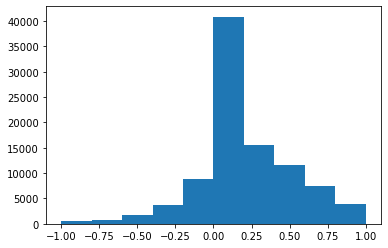

In [4]:
plt.hist(data.polarity)

<BarContainer object of 2 artists>

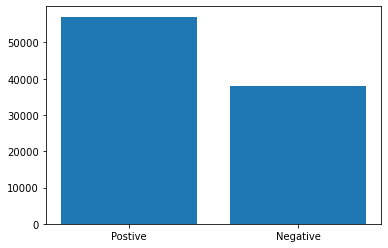

In [5]:
data['neg_pos']=data['polarity']
data['neg_pos']=data.polarity>0
num_pos=sum(data['neg_pos'])
num_neg=len(data['neg_pos'])-num_pos
plt.bar(['Postive','Negative'], [num_pos,num_neg])

# Sentiment analysis VS Actual star rate

Star rate distribution (negative result): 
 3    12365
1    10218
2     7876
4     3979
5     3468
Name: score_x, dtype: int64


(array([10218.,     0.,  7876.,     0.,     0., 12365.,     0.,  3979.,
            0.,  3468.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

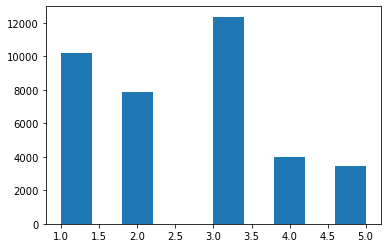

In [7]:
print('Star rate distribution (negative result): \n', data.score_x[data.polarity<=0].value_counts())
plt.hist(data.score_x[data.polarity<=0])

Star rate distribution (Positive result): 
 3    18982
5    12448
4    11821
2     7780
1     6066
Name: score_x, dtype: int64


(array([ 6066.,     0.,  7780.,     0.,     0., 18982.,     0., 11821.,
            0., 12448.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

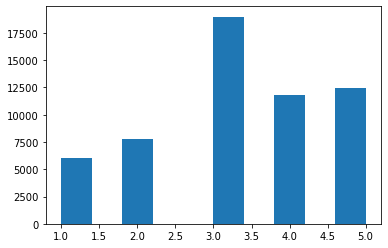

In [9]:
data.score_x[data.polarity>0].value_counts()
print('Star rate distribution (Positive result): \n', data.score_x[data.polarity>0].value_counts())
plt.hist(data.score_x[data.polarity>0])

# Sentiement Analysis Plot

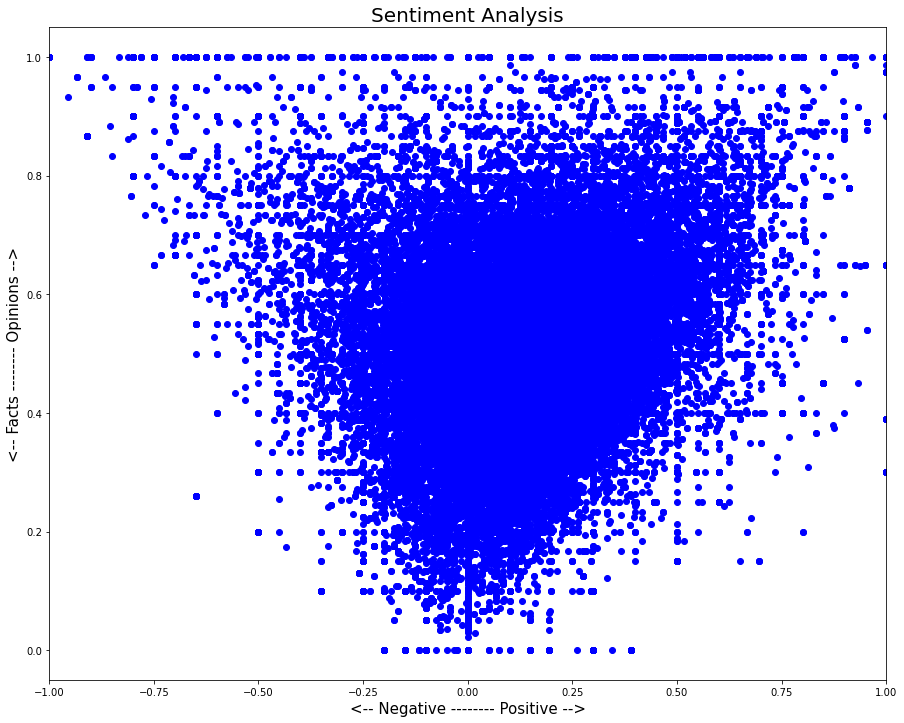

In [10]:
plt.rcParams['figure.figsize'] = [15, 12]

x = data.polarity
y = data.subjectivity
plt.scatter(x, y, color='blue')
plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Sentiment of Routine Over Time by apps

In [11]:
data['time'] = list(map(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S"),data['at']))

data['year_month']= list(map(lambda x: x.strftime('%Y-%m'),data['time']))
data['year']= list(map(lambda x: x.strftime('%Y'),data['time']))

In [12]:
app_time=data.groupby(['title','year_month'],sort=True).sum().reset_index().iloc[:,[0,1]]

app_time['content']=app_time['title']

for index, app in enumerate(app_time['title']):
    strings=' '.join(data.content[(data.title==app) & (data.year_month==app_time.year_month[index])])
    app_time['content'][index]=strings

In [13]:
app_time['polarity'] = app_time['content'].apply(pol)
app_time['subjectivity'] = app_time['content'].apply(sub)

In [14]:
top_num_review=data.groupby('title',sort=True).ratings.mean().sort_values(ascending=False).reset_index().head(5)
top_num_review

,title,ratings
0,YouTube,92824486
1,Google Play services,33370074
2,Google Photos,31997870
3,Google Chrome: Fast & Secure,28039512
4,Google,17941099


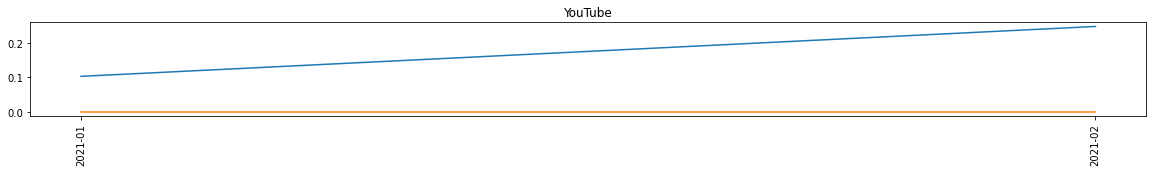

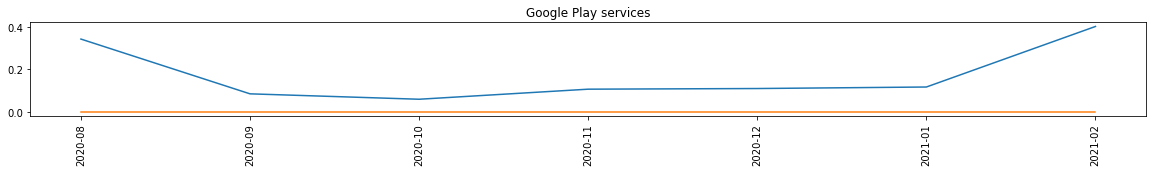

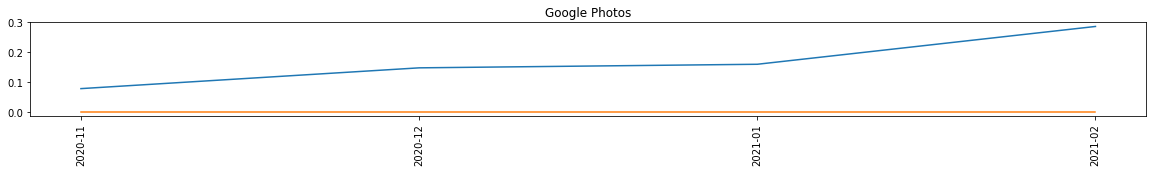

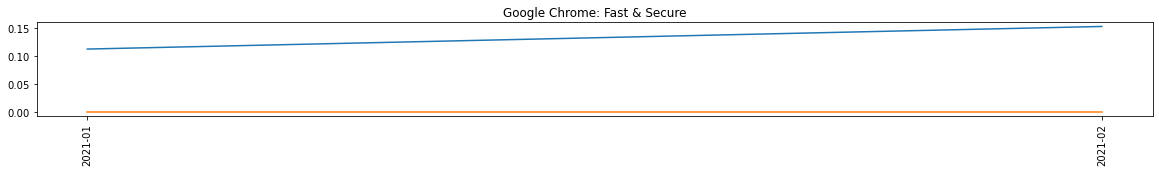

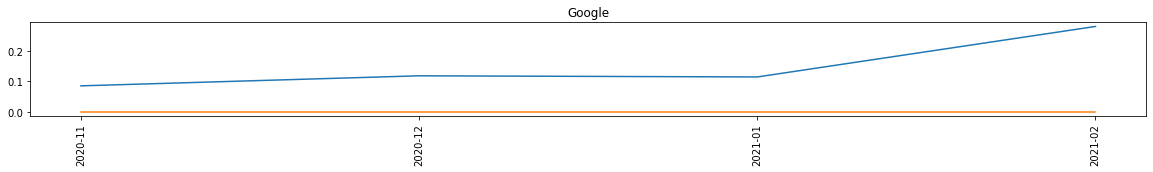

In [23]:
plt.rcParams['figure.figsize'] = [20, 10]

title_unique=app_time.title.unique()
for i in range(len(top_num_review)):
    x = app_time['year_month'][app_time.title==top_num_review.title[i]]
    y = app_time['polarity'][app_time.title==top_num_review.title[i]]
    plt.subplot(5,1,i+1)
    plt.plot(x, y)
    plt.plot(np.arange(0,len(x)), np.zeros(len(x)))
    plt.xticks(rotation=90)
    plt.title(top_num_review.title[i])
    plt.show()

# Sentiment of Routine Over Time

In [24]:
all_time=data.groupby(['year_month'],sort=True).sum().reset_index().iloc[:,[0]]
all_time['content']=all_time['year_month']

for index, time in enumerate(all_time['year_month']):
    strings=' '.join(data.content[data.year_month==time])
    all_time['content'][index]=strings

In [25]:
all_time['polarity'] = all_time['content'].apply(pol)
all_time['subjectivity'] = all_time['content'].apply(sub)

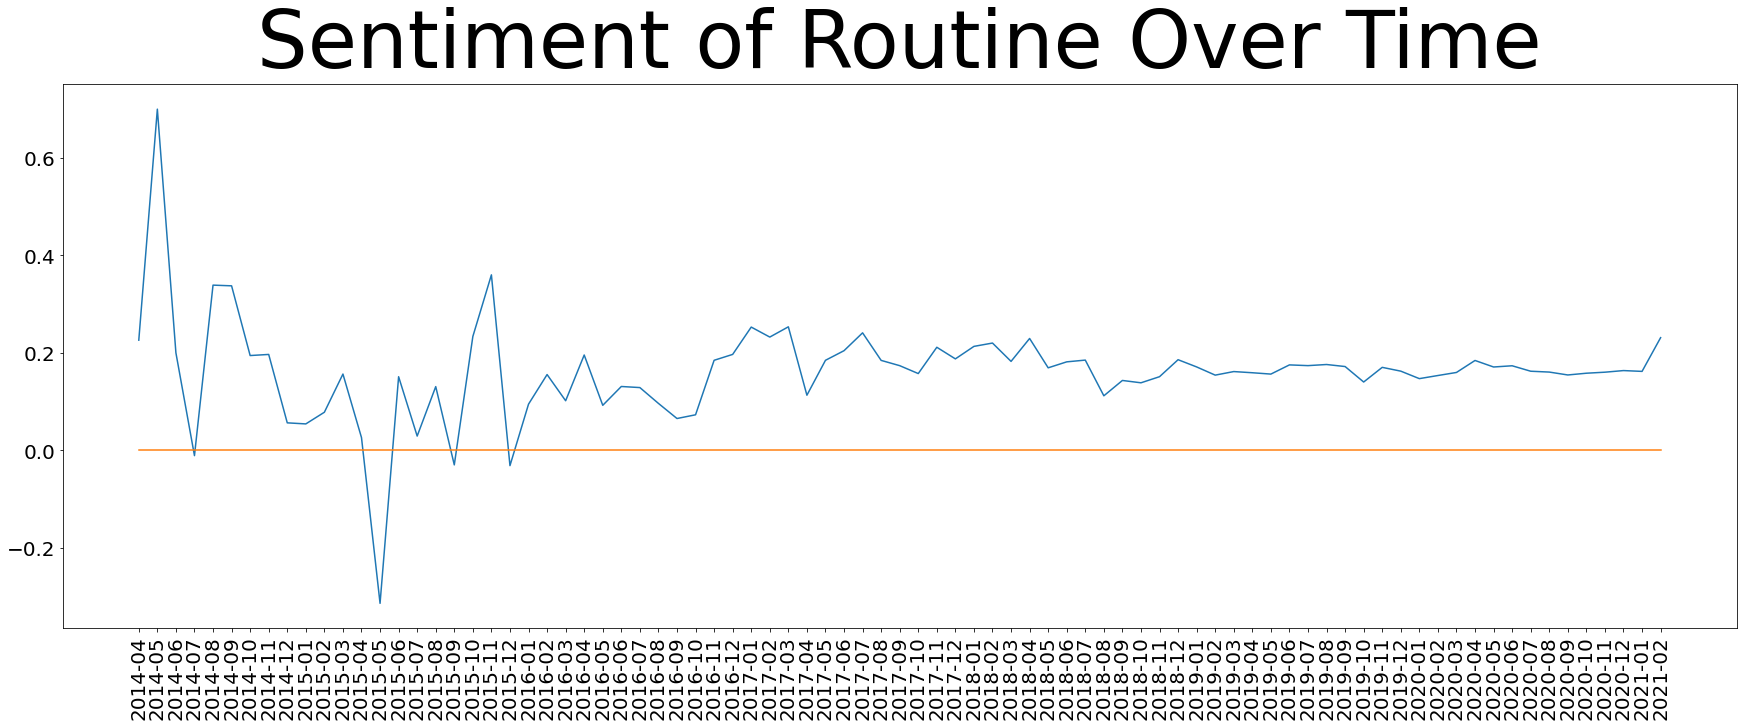

In [26]:
plt.rcParams['figure.figsize'] = [30, 10]

title_unique=app_time.title.unique()

x = all_time['year_month']
y = all_time['polarity']
plt.plot(x, y)
plt.plot(np.arange(0,len(x)), np.zeros(len(x)))
plt.xticks(rotation=90, size=20)
plt.yticks(size=20)
plt.title('Sentiment of Routine Over Time', size= 80)
plt.show()